In [ ]:
import pandas as pd

# Load the Excel file
file_path = '/content/sample_data/시계열분석_복합SCFI_2017.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
data.head()

,YYYYMM,SCFI_C
0,2014-01,1174.866
1,2014-02,1069.362
2,2014-03,969.145
3,2014-04,1078.462
4,2014-05,1137.112


# 도표 18-13. SARIMA 예측 결과

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn(

Best ARIMA Order: (1, 1, 1)
Best Seasonal Order: (1, 1, 1, 12)
Best Train RMSE: 228.49965926876942
Best Test RMSE: 54.147612275484086


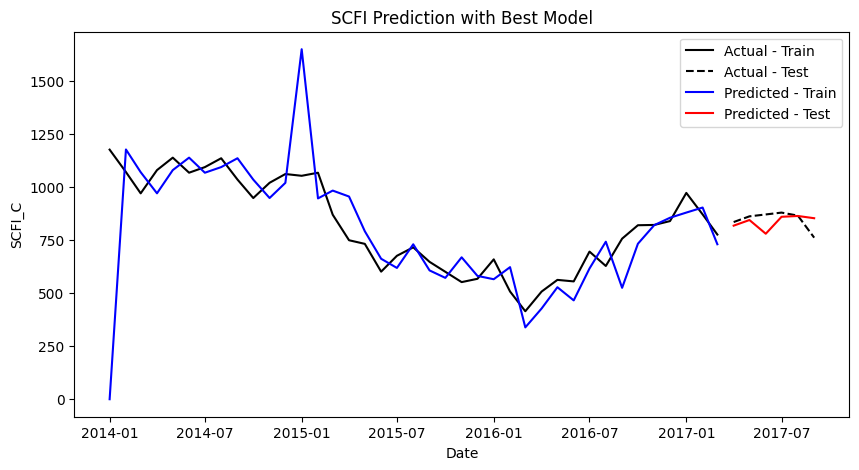

In [ ]:
# 필요한 라이브러리를 설치합니다
!pip install pandas numpy statsmodels sklearn matplotlib

# 라이브러리를 불러옵니다
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from itertools import product


# 날짜 형식을 datetime으로 변환하고 인덱스로 설정
data['YYYYMM'] = pd.to_datetime(data['YYYYMM'], format='%Y-%m')
data.set_index('YYYYMM', inplace=True)

# 데이터를 훈련 및 테스트 데이터로 분리
train_data = data[:-6]  # 마지막 6개월을 제외한 모든 데이터
test_data = data[-6:]  # 마지막 6개월 데이터

# 모든 파라미터 조합 생성
p = d = q = range(0, 2)  # p, d, q can be 0, 1
P = D = Q = range(0, 2)  # Seasonal P, D, Q can be 0, 1
s = 12  # Seasonal period
parameters = list(product(p, d, q, P, D, Q))

best_rmse = float('inf')
best_params = None

# 각 파라미터 조합에 대해 SARIMA 모델을 훈련하고 RMSE 계산
for params in parameters:
    order = params[:3]
    seasonal_order = params[3:] + (s,)
    try:
        model = SARIMAX(train_data['SCFI_C'], order=order, seasonal_order=seasonal_order)
        model_fit = model.fit(disp=False)

        # 테스트 데이터 예측
        test_forecast = model_fit.get_forecast(steps=6)
        test_predictions = test_forecast.predicted_mean
        test_rmse = sqrt(mean_squared_error(test_data['SCFI_C'], test_predictions))

        # 최적 파라미터 업데이트
        if test_rmse < best_rmse:
            best_rmse = test_rmse
            best_params = (order, seasonal_order)

    except Exception as e:
        continue

# 최적 모델 훈련 및 RMSE 계산
best_order, best_seasonal_order = best_params
best_model = SARIMAX(train_data['SCFI_C'], order=best_order, seasonal_order=best_seasonal_order)
best_model_fit = best_model.fit(disp=False)
train_forecast = best_model_fit.get_prediction(start=train_data.index[0], end=train_data.index[-1])
train_predictions = train_forecast.predicted_mean
train_rmse = sqrt(mean_squared_error(train_data['SCFI_C'], train_predictions))

# 최적의 결과 출력
print('Best ARIMA Order:', best_order)
print('Best Seasonal Order:', best_seasonal_order)
print('Best Train RMSE:', train_rmse)
print('Best Test RMSE:', best_rmse)

# 최적 모델을 사용하여 그래프 출력
test_forecast = best_model_fit.get_forecast(steps=6)
test_predictions = test_forecast.predicted_mean

plt.figure(figsize=(10, 5))
plt.plot(train_data['SCFI_C'], color='black', label='Actual - Train')
plt.plot(test_data['SCFI_C'], color='black', label='Actual - Test', linestyle='--')
plt.plot(train_predictions, color='blue', label='Predicted - Train')
plt.plot(test_predictions, color='red', label='Predicted - Test')
plt.title('SCFI Prediction with Best Model')
plt.xlabel('Date')
plt.ylabel('SCFI_C')
plt.legend()
plt.show()


# 도표 18-14. ARIMAX(1, 1, 1)(1, 1, 1, 12) 결과 요약

In [ ]:
best_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             SCFI_C   No. Observations:                   39
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -155.216
Date:                            Thu, 23 May 2024   AIC                            320.432
Time:                                    10:10:18   BIC                            326.723
Sample:                                01-01-2014   HQIC                           322.244
                                     - 03-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5200      1.806     -0.288      0.773      -4.060       3.020
ma.L1          0.6593      1.731      0.381      0.703      -2.733       4.052
ar.S.L12       0.0197      2.007      0.010      0.992      -3.914       3.954
ma.S.L12      -0.9862    135.705     -0.007      0.994    -266.964     264.991
sigma2      5469.3475   7.31e+05      0.007      0.994   -1.43e+06    1.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.01
Prob(Q):                              0.82   Prob(JB):                         1.00
Heteroskedasticity (H):               1.48   Skew:                            -0.04
Prob(H) (two-sided):                  0.57   Kurtosis:                         3.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 도표 18-15. SARIMA 모형 생성과 학습 파이썬 코드

# 도표 18-16. SARIMA 훈련데이터와 테스트데이터의 예측 파이썬 코드

In [ ]:
best_model = SARIMAX(train_data['SCFI_C'], order=best_order, seasonal_order=best_seasonal_order)
best_model_fit = best_model.fit(disp=False)


train_forecast = best_model_fit.get_prediction(start=train_data.index[0], end=train_data.index[-1])
train_predictions = train_forecast.predicted_mean
test_forecast = best_model_fit.get_forecast(steps=6)
test_predictions = test_forecast.predicted_mean


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
